In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import poisson

## Problem 2

In [201]:
array = []
mean_array = []
dispersion_array = []
n = 100 
rv = poisson(17)
for k in range(0, 15):
    x = rv.rvs(size = n)
    array.append(x)
    meanval = np.mean(x)
    mean_array.append(abs(meanval - 17))
    #dispersion_array.append(abs(np.std(x)**2 - 17))
    disp = 0
    for i in range(100):
        disp += (array[k][i] - meanval)**2
    dispersion_array.append(abs(disp/99 - 17))
print(mean_array)
print(dispersion_array)
##оценка средним арифметическим более точная

[0.23999999999999844, 0.8299999999999983, 0.08999999999999986, 0.28000000000000114, 0.6000000000000014, 0.05999999999999872, 0.5100000000000016, 0.48999999999999844, 0.41000000000000014, 0.5599999999999987, 0.23999999999999844, 0.41000000000000014, 0.10000000000000142, 0.21999999999999886, 0.2699999999999996]
[2.9369696969696992, 3.3625252525252485, 0.4362626262626321, 4.048888888888886, 2.9999999999999982, 1.5894949494949433, 2.6059595959595967, 2.666767676767675, 0.9374747474747487, 0.4480808080808103, 0.7147474747474725, 2.5372727272727325, 1.7171717171717233, 0.24404040404038696, 0.21505050505050605]


## Problem 4

In [198]:
df = pd.read_csv('breast_cancer_1000_genes.tsv', sep = '\t', index_col = 0)
df['max'] = df.max(axis = 1)
df['min'] = df.min(axis = 1)
df['diff'] = df['max'] - df['min']
df_sorted = df.sort_values(['diff']).head(10)
df_sorted = df_sorted.drop('diff', 1)
#df_sorted = df_sorted.loc[:, 'max':'min'].head(10)
df_sorted = df_sorted.T
df_sorted = df_sorted.melt(var_name = 'Gene', value_name = 'Values')
print(df_sorted)

        Gene    Values
0     HNRNPK  6.675441
1     HNRNPK  6.796077
2     HNRNPK  6.958441
3     HNRNPK  7.068352
4     HNRNPK  6.991517
...      ...       ...
1015   RAB7A  6.980481
1016   RAB7A  6.494139
1017   RAB7A  6.403192
1018   RAB7A  7.769761
1019   RAB7A  6.068021

[1020 rows x 2 columns]


In [161]:
df1 = pd.read_csv('breast_cancer_1000_genes.tsv', sep = '\t', index_col = 0)
var = []
for i in range(1000):
    meanval = sum(df1.iloc[i])/len(df1.iloc[i])
    array = 0
    for j in range(100):
        array += (df1.iloc[i, j] - meanval)**2
    var.append(array/99)
df1['var'] = var
#print(df1)  
df1_sorted = df1.sort_values(['var']).head(10)
df1_sorted = df1_sorted.drop('var', 1)
df1_sorted = df1_sorted.T
df1_sorted = df1_sorted.melt(var_name = 'Gene', value_name = 'Values')

In [162]:
df2 = pd.read_csv('breast_cancer_1000_genes.tsv', sep = '\t', index_col = 0)
IQR = []
for i in range(1000):
    IQR.append(np.percentile(df2.iloc[i], 75, interpolation='higher') - np.percentile(df2.iloc[i], 25, interpolation='lower'))
df2['IQR'] = IQR
df2_sorted = df2.sort_values(['IQR']).head(10)
df2_sorted = df2_sorted.drop('IQR', 1)
df2_sorted = df2_sorted.T
df2_sorted = df2_sorted.melt(var_name = 'Gene', value_name = 'Values')

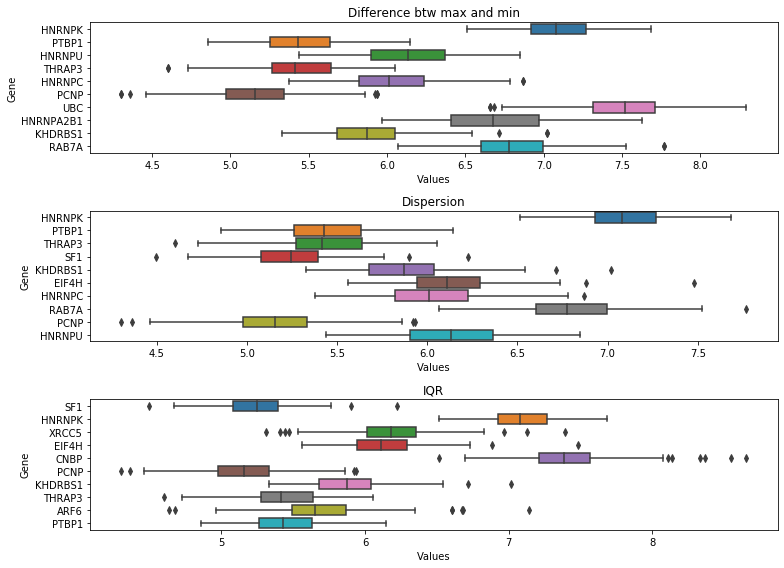

In [165]:
a4_dims = (11, 8)
fig, ax = plt.subplots(3, 1, figsize=a4_dims)
sns.boxplot(ax = ax[0], data = df_sorted, x = 'Values', y = 'Gene').set_title('Difference btw max and min')
sns.boxplot(ax=ax[1], data = df1_sorted, x = 'Values', y = 'Gene').set_title('Dispersion')
sns.boxplot(ax=ax[2], data = df2_sorted, x = 'Values', y = 'Gene').set_title('IQR')
plt.tight_layout()

## Problem 5

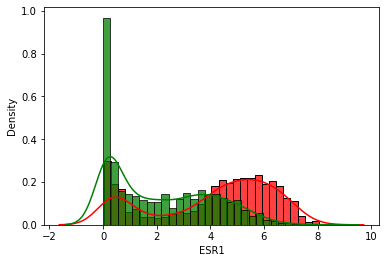

In [181]:
data = pd.read_csv('breast_cancer_key_genes.tsv', sep = '\t', index_col = 0)
sns.histplot(x = data['ESR1'], bins = 30, stat = 'density', color = 'red')
sns.kdeplot(x = data['ESR1'], color = 'red')
sns.histplot(x = data['PGR'], bins = 30, stat = 'density', color = 'green')
sns.kdeplot(x = data['PGR'], color = 'green')